## For this project we will take a look at data for American bills and attempt to classify them as counterfit or real

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('fake_bills.csv',sep=';')

In [ ]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## Exploratory Data Analysis

In [ ]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [ ]:
df['is_genuine'] = df['is_genuine'].astype(int)

In [ ]:
null_true = df[df['margin_low'].isnull()==True]

In [ ]:
null_false = df[df['margin_low'].isnull()==False]

In [ ]:
X1 = null_false.drop('margin_low',axis=1)
y1 = null_false['margin_low']

X2 = null_true.drop('margin_low',axis=1)
y2 = null_true['margin_low']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kmn = KNeighborsRegressor(n_neighbors=1)

In [ ]:
kmn.fit(X1,y1)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
pred = kmn.predict(X2)

In [ ]:
X2['margin_low'] = pred

In [ ]:
df = null_false.append(X2)

<AxesSubplot:>

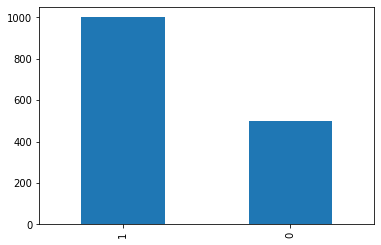

In [ ]:
df['is_genuine'].value_counts().plot(kind='bar')

In [ ]:
cols = df[['diagonal','height_left','height_right','margin_low','margin_up','length']]

In [ ]:
df.corr()['is_genuine'].sort_values(ascending=False)

is_genuine      1.000000
length          0.849285
diagonal        0.132756
height_left    -0.379833
height_right   -0.485092
margin_up      -0.606262
margin_low     -0.783307
Name: is_genuine, dtype: float64

### Log Regression

In [ ]:
X = df.drop('is_genuine',axis=1)
y = df['is_genuine']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=99)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[142   3]
 [  2 303]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       145
           1       0.99      0.99      0.99       305

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
## Correctly predicted 99% of fake bills

In [ ]:
from imblearn.over_sampling import SMOTE

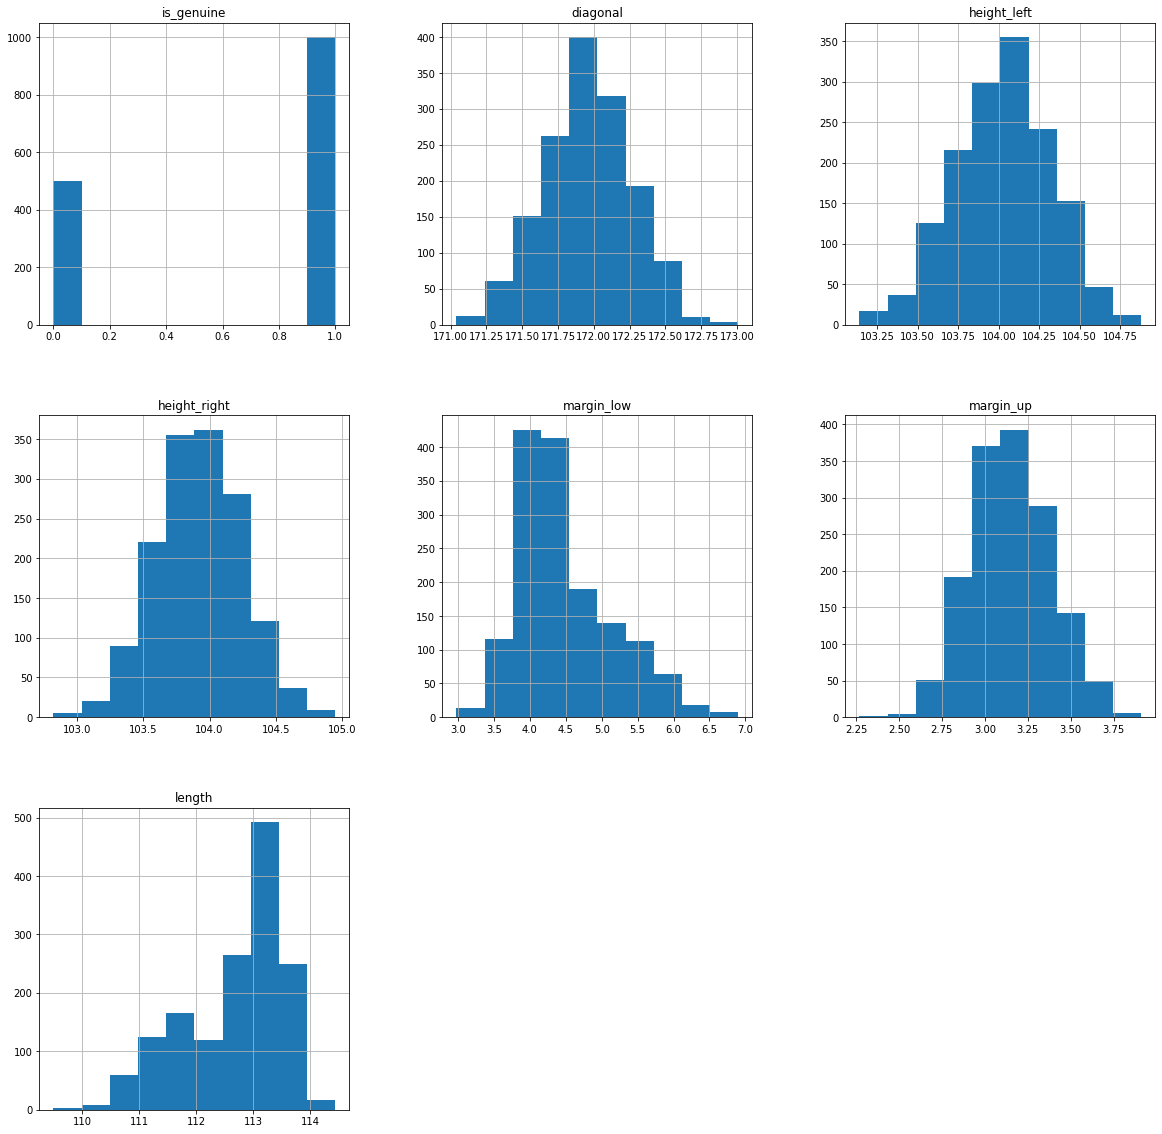

In [ ]:
df.hist(figsize=(20, 20))
plt.show()

In [ ]:
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

df = pd.concat([X_sm, y_sm], axis=1)

print("[PRE OVERSAMPLING]\n Rows : {}".format(df.shape[0]))
print("\n[POST OVERSAMPLING]\n Rows : {}".format(df.shape[0]))

print("\n[POST OVERSAMPLING BREAKDOWN]")
df['is_genuine'].value_counts()

[PRE OVERSAMPLING]
 Rows : 2000

[POST OVERSAMPLING]
 Rows : 2000

[POST OVERSAMPLING BREAKDOWN]


1    1000
0    1000
Name: is_genuine, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=99)

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[142   3]
 [  2 303]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       145
           1       0.99      0.99      0.99       305

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[142   3]
 [  2 303]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       145
           1       0.99      0.99      0.99       305

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
# Dropping out neurons
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout,Dense

model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(3,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(2,activation='relu'))
model.add(Dropout(rate=0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/1000
33/33 [==============================] - 2s 8ms/step - loss: 26.6077 - val_loss: 6.3489
Epoch 2/1000
33/33 [==============================] - 0s 3ms/step - loss: 17.6811 - val_loss: 5.3768
Epoch 3/1000
33/33 [==============================] - 0s 3ms/step - loss: 11.4577 - val_loss: 4.0029
Epoch 4/1000
33/33 [==============================] - 0s 3ms/step - loss: 4.6227 - val_loss: 2.7117
Epoch 5/1000
33/33 [==============================] - 0s 3ms/step - loss: 3.2056 - val_loss: 1.6008
Epoch 6/1000
33/33 [==============================] - 0s 3ms/step - loss: 1.7554 - val_loss: 0.9665
Epoch 7/1000
33/33 [==============================] - 0s 3ms/step - loss: 1.1631 - val_loss: 0.6373
Epoch 8/1000
33/33 [==============================] - 0s 2ms/step - loss: 0.7121 - val_loss: 0.6659
Epoch 9/1000
33/33 [==============================] - 0s 2ms/step - loss: 0.6670 - val_loss: 0.6620
Epoch 10/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.6638 - val_loss: 0.6

In [ ]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

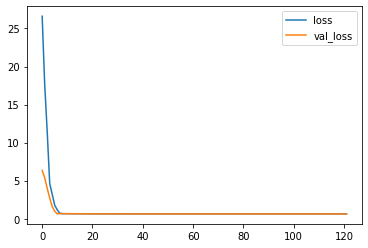

In [ ]:
model_loss.plot()

In [ ]:
predictions = (model.predict(X_test)>0.5).astype(int)

15/15 [==============================] - 0s 2ms/step


In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0 145]
 [  0 305]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.68      1.00      0.81       305

    accuracy                           0.68       450
   macro avg       0.34      0.50      0.40       450
weighted avg       0.46      0.68      0.55       450



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
